## [Example: What is the Average Populaton of the Argentina Provinces?](https://jakevdp.github.io/PythonDataScienceHandbook/02.04-computation-on-arrays-aggregates.html#Example:-What-is-the-Average-Height-of-US-Presidents?)

Aggregates available in NumPy can be extremely useful for summarizing a set of values. As a simple example, let's consider the heights of all US presidents. This data is available in the file provincias-ar.csv, which is a simple comma-separated list of labels and values:

In [22]:
!head -5 data/provincias-ar.csv

categoria|centroide_lat|centroide_lon|fuente|id|iso_id|iso_nombre|nombre|nombre_completo|poblacion|poblacion_urbana|poblacion_rural|superficie|densidad
Provincia|-36.6769415180527|-60.5588319815719|IGN|6|AR-B|Buenos Aires|Buenos Aires|Provincia de Buenos Aires|15625084|15190440|434644|307571|50.8
Provincia|-27.3358332810217|-66.9476824299928|IGN|10|AR-K|Catamarca|Catamarca|Provincia de Catamarca|367828|283706|84122|102602|3.6
Provincia|-26.3864309061226|-60.7658307438603|IGN|22|AR-H|Chaco|Chaco|Provincia del Chaco|1055259|892688|162571|99633|10.6
Provincia|-43.7886233529878|-68.5267593943345|IGN|26|AR-U|Chubut|Chubut|Provincia del Chubut|509108|464268|4484|224686|2.3


We'll use the Pandas package to read the file and extract this information

In [2]:
import numpy as np 
import pandas as pd 
data = pd.read_csv('data/provincias-ar.csv', sep="|")
populations = np.array(data['poblacion'])
print(populations)

[15625084   367828  1055259   509108  2890151  3308876   992595  1235994
   530162   673307   318951   333642  1738929  1101593   551266   638645
  1214441   681055    43231   273964  3194537   874006   127205  1448188]


Now that we have this data array, we can compute a variety of summary statistics:

In [4]:
print("Mean population:       ", populations.mean())
print("Standard deviation:", populations.std())
print("Minimum population:    ", populations.min())
print("Maximum population:    ", populations.max())

Mean population:        1655334.0416666667
Standard deviation: 3046154.300945682
Minimum population:     43231
Maximum population:     15625084


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values. We may also wish to compute quantiles:

In [5]:
print("25th percentile:   ", np.percentile(populations, 25))
print("Median:            ", np.median(populations))
print("75th percentile:   ", np.percentile(populations, 75))

25th percentile:    473788.0
Median:             777530.5
75th percentile:    1289042.5


We see that the median population of Argentina provinces is 777530.5

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib. For example, this code generates the following chart:

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

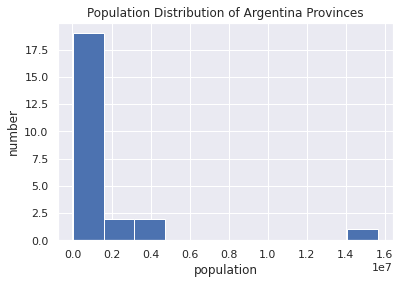

In [7]:
plt.hist(populations)
plt.title('Population Distribution of Argentina Provinces')
plt.xlabel('population')
plt.ylabel('number');


## Plotting a two-dimensional function

One place that broadcasting is very useful is in displaying images based on two-dimensional functions. If we want to define a function $z = f(x, y)$, broadcasting can be used to compute the function across the grid:


In [14]:
# x and y have 100 steps from 0 to 5
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

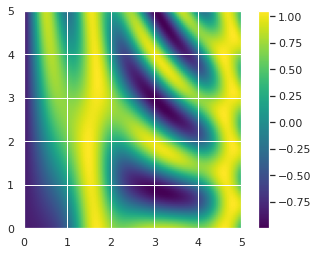

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();


## Example: Counting Rainy Days

Imagine you have a series of data that represents the amount of historic precipitation per month in a given city. For example, here we'll load the daily rainfall statistics for the city of Buenos Aires from 2019-10-27 to 2020-10-28, using Pandas


In [28]:
# use pandas to extract rainfall mm as a NumPy array
rainfall = pd.read_csv('data/registro_meteorologico_2020-10-28_2019_10_17_baires.csv')['precipitacion'].values
rainfall.shape

(365,)

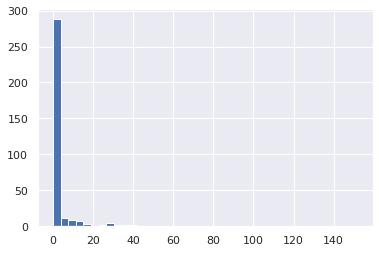

In [29]:
plt.hist(rainfall, 40);

## Boolean operators

We've already seen how we might count, say, all days with rain less than four inches, or all days with rain greater than two inches. But what if we want to know about all days with rain less than four inches and greater than one inch? This is accomplished through Python's bitwise logic operators, `&`, `|`, `^`, and `~`. Like with the standard arithmetic operators, NumPy overloads these as ufuncs which work element-wise on (usually Boolean) arrays.

Using these tools, we might start to answer the types of questions we have about our weather data. Here are some examples of results we can compute when combining masking with aggregations:

In [37]:
print("Number days without rain:      ", np.sum(rainfall == 0))
print("Number days with rain:         ", np.sum(rainfall != 0))
print("Days with more than 30mm:", np.sum(rainfall > 30))
print("Days with less than 10mm:", np.sum((rainfall > 0) & (rainfall < 10)))

Number days without rain:       259
Number days with rain:          106
Days with more than 30mm: 9
Days with less than 10mm: 49



## Boolean Arrays as Masks

A powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves. When generating a Boolean array, what is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is `True`.

We are then free to operate on these values as we wish. For example, we can compute some relevant statistics on our Buenos Aires rain data:



In [39]:
# construct a mask of all rainy days
rainy = (rainfall > 0)

# construct a mask of all summer days considering:
# - March 21st is the 212nd day
# - December 21st is the 311th day 
# - dataset is in reverse order)
days = np.arange(365)
summer = (days > 212) & (days < 262)

# there could be NaN in data. Using NaN-safe Version
print("Median precip on rainy days in 2019 (mm):   ", np.nanmedian(rainfall[rainy]).round())
print("Median precip on summer days in 2019 (mm):  ", np.nanmedian(rainfall[summer]))
print("Maximum precip on summer days in 2014 (mm): ", np.nanmax(rainfall[summer]))
print("Median precip on non-summer rainy days (mm):", np.nanmedian(rainfall[rainy & ~summer]))

Median precip on rainy days in 2019 (mm):    6.0
Median precip on summer days in 2019 (mm):   0.0
Maximum precip on summer days in 2014 (mm):  41.9
Median precip on non-summer rainy days (mm): 5.3


By combining Boolean operations, masking operations, and aggregates, we can very quickly answer these sorts of questions for our dataset.


## Using the Keywords and/or Versus the Operators &/|

One common point of confusion is the difference between the keywords `and` and `or` on one hand, and the operators `&` and `|` on the other hand. When would you use one versus the other?

The difference is this: `and` and `or` gauge the truth or falsehood of entire object, while `&` and `|` refer to bits within each object.

When you use `and` or `or`, it's equivalent to asking Python to treat the object as a single Boolean entity. In Python, all nonzero integers will evaluate as True. Thus:


In [40]:
bool(42), bool(0)

(True, False)

In [41]:
bool(42 and 0)

False

In [42]:
bool(42 or 0)

True

When you use `&` and `|` on integers, the expression operates on the bits of the element, applying the _and_ or the _or_ to the individual bits making up the number:

In [43]:
bin(42)

'0b101010'

In [44]:
bin(59)

'0b111011'

In [45]:
bin(42 & 59)

'0b101010'

In [46]:
bin(42 | 59)

'0b111011'


Notice that the corresponding bits of the binary representation are compared in order to yield the result.

When you have an array of Boolean values in NumPy, this can be thought of as a string of bits where `1 = True` and `0 = False`, and the result of `&` and `|` operates similarly to above:


In [47]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

Using `or` on these arrays will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value:

In [48]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Similarly, when doing a Boolean expression on a given array, you should use `|` or `&` rather than `or` or `and`:

In [53]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [54]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

So remember this: `and` and `or` perform a single Boolean evaluation on an entire object, while `&` and `|` perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object. For Boolean NumPy arrays, the latter is nearly always the desired operation.


## Exploring Fancy Indexing

Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once. For example, consider the following array:


In [55]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Suppose we want to access three different elements. We could do it like this:

In [56]:
[x[3], x[7], x[2]]

[71, 86, 14]

Alternatively, we can pass a single list or array of indices to obtain the same result:

In [58]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed:

In [59]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Fancy indexing also works in multiple dimensions. Consider the following array:

In [60]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [61]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

Notice that the first value in the result is `X[0, 2]`, the second is `X[1, 1]`, and the third is `X[2, 3]`. The pairing of indices in fancy indexing follows all the broadcasting rules. So, for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional result:

In [62]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Here, each row value is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations. For example:

In [63]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

It is always important to remember with fancy indexing that the return value reflects the __broadcasted shape of the indices__, rather than the shape of the array being indexed.   

## Combined Indexing

For even more powerful operations, fancy indexing can be combined with the other indexing schemes we've seen:

In [64]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


We can combine fancy and simple indices:

In [65]:
X[2, [2, 0, 1]]

array([10,  8,  9])

We can also combine fancy indexing with slicing:

In [66]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

And we can combine fancy indexing with masking:

In [67]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

All of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values.

## Example: Selecting Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix. For example, we might have an $N$
by $D$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution:

In [69]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

Using the plotting tools of Matplotlib, we can visualize these points as a scatter-plot:

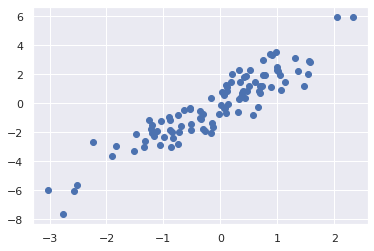

In [70]:
plt.scatter(X[:, 0], X[:, 1]);

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [71]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([37, 28, 56,  2, 93, 63, 58, 82, 11, 39, 64, 74, 25, 69, 68, 38, 59,
       33, 52, 76])

In [72]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

Now to see which points were selected, let's over-plot large circles at the locations of the selected points:

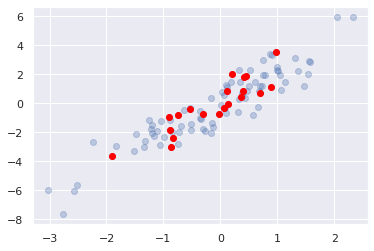

In [79]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='red');

This sort of strategy is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models, and in sampling approaches to answering statistical questions.

## Modifying Values with Fancy Indexing

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array. For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

In [80]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


We can use any assignment-type operator for this. For example:

In [82]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Notice, though, that repeated indices with these operations can cause some potentially unexpected results. Consider the following:

In [83]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Where did the 4 go? The result of this operation is to first assign `x[0] = 4`, followed by `x[0] = 6`. The result, of course, is that `x[0]` contains the value `6`.

Fair enough, but consider this operation:

In [84]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

You might expect that `x[3]` would contain the value 2, and `x[4]` would contain the value 3, as this is how many times each index is repeated. Why is this not the case? Conceptually, this is because `x[i] += 1` is meant as a shorthand of `x[i] = x[i] + 1`. `x[i] + 1` is evaluated, and then the result is assigned to the indices in `x`. With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

So what if you want the other behavior where the operation is repeated? For this, you can use the `at()` method of ufuncs (available since NumPy 1.8), and do the following:


In [85]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


The `at()` method does an in-place application of the given operator at the specified indices (here, `i`) with the specified value (here, `1`). Another method that is similar in spirit is the `reduceat()` method of ufuncs, which you can read about in the NumPy documentation.


## Example: Binning Data

You can use these ideas to efficiently bin data to create a histogram by hand. For example, imagine we have 1000 values and would like to quickly find where they fall within an array of bins. We could compute it using `ufunc.at` like this:


In [88]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

The counts now reflect the number of points within each bin–in other words, a histogram:

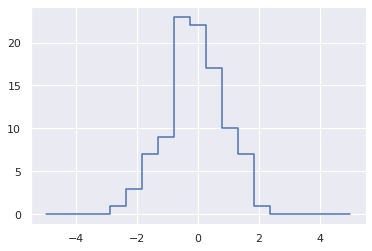

In [91]:
# plot the results
plt.plot(bins, counts, drawstyle='steps')

Of course, it would be silly to have to do this each time you want to plot a histogram. This is why Matplotlib provides the `plt.hist()` routine, which does the same in a single line:

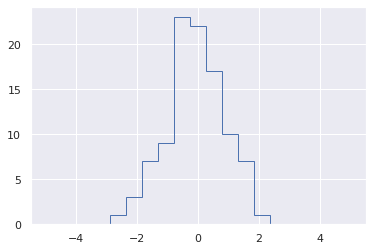

In [92]:
plt.hist(x, bins, histtype='step');

This function will create a nearly identical plot to the one seen here. To compute the binning, `matplotlib` uses the `np.histogram` function, which does a very similar computation to what we did before. Let's compare the two here:

In [93]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
36.9 µs ± 773 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
19.5 µs ± 824 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Our own one-line algorithm is several times faster than the optimized algorithm in NumPy! How can this be? If you dig into the `np.histogram` source code (you can do this in IPython by typing `np.histogram??`), you'll see that it's quite a bit more involved than the simple search-and-count that we've done; this is because NumPy's algorithm is more flexible, and particularly is designed for better performance when the number of data points becomes large:

In [96]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
81.9 ms ± 829 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
118 ms ± 2.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


What this comparison shows is that algorithmic efficiency is almost never a simple question. An algorithm efficient for large datasets will not always be the best choice for small datasets, and vice versa (see Big-O Notation). But the advantage of coding this algorithm yourself is that with an understanding of these basic methods, you could use these building blocks to extend this to do some very interesting custom behaviors. The key to efficiently using Python in data-intensive applications is knowing about general convenience routines like np.histogram and when they're appropriate, but also knowing how to make use of lower-level functionality when you need more pointed behavior.

## Sorting Arrays
A simple selection sort repeatedly finds the minimum value from a list, and makes swaps until the list is sorted. We can code this in just a few lines of Python:

In [8]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

Selection sort is no the most efficiant sort algorithm. Even selection sort, though, is much better than the bogosort:

In [10]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

Python contains built-in sorting algorithms that are much more efficient than either of the simplistic algorithms just shown. We'll start by looking at the Python built-ins, and then take a look at the routines included in NumPy and optimized for NumPy arrays.

## Fast Sorting in NumPy: `np.sort` and `np.argsort`

Although Python has built-in `sort` and `sorted` functions to work with lists, we won't discuss them here because NumPy's `np.sort` function turns out to be much more efficient and useful for our purposes. By default `np.sort` uses an $O[NlogN]$, quicksort algorithm, though mergesort and heapsort are also available. For most applications, the default quicksort is more than sufficient.

To return a sorted version of the array without modifying the input, you can use `np.sort`:


In [17]:
x = np.array([2, 1, 4, 3, 5])
print(np.sort(x))
print(x)

[1 2 3 4 5]
[2 1 4 3 5]


If you prefer to sort the array in-place, you can instead use the `sort` method of arrays:

In [15]:
x = np.array([2, 1, 4, 3, 5])
x.sort()
print(x)

[1 2 3 4 5]


A related function is `argsort`, which instead returns the indices of the sorted elements:

In [18]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on. These indices can then be used (via fancy indexing) to construct the sorted array if desired:

In [19]:
x[i]

array([1, 2, 3, 4, 5])

## Sorting along rows or columns

A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the `axis` argument. For example:


In [20]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [21]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [22]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!


## Partial Sorts: Partitioning

Sometimes we're not interested in sorting the entire array, but simply want to find the k smallest values in the array. NumPy provides this in the `np.partition` function. `np.partition` takes an array and a number K; the result is a new array with the smallest K values to the left of the partition, and the remaining values to the right, in arbitrary order:


In [23]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values. Within the two partitions, the elements have arbitrary order.

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [24]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots. 

As there is a `np.argsort` that computes indices of the sort, there is a `np.argpartition` that computes indices of the partition

## Example: k-Nearest Neighbors

Let's quickly see how we might use this `argsort` function along multiple axes to find the nearest neighbors of each point in a set. We'll start by creating a random set of 10 points on a two-dimensional plane. Using the standard convention, we'll arrange these in a $10×2$
array:

In [40]:
X = rand.rand(10, 2)
X

array([[0.52083426, 0.96117202],
       [0.84453385, 0.74732011],
       [0.53969213, 0.58675117],
       [0.96525531, 0.60703425],
       [0.27599918, 0.29627351],
       [0.16526694, 0.01563641],
       [0.42340148, 0.39488152],
       [0.29348817, 0.01407982],
       [0.1988424 , 0.71134195],
       [0.79017554, 0.60595997]])

To get an idea of how these points look, let's quickly scatter plot them:

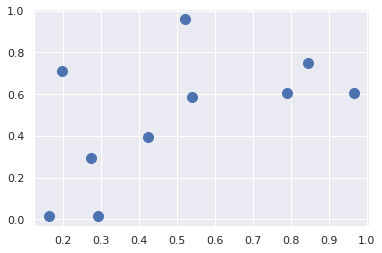

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

Now we'll compute the distance between each pair of points. Recall that the squared-distance between two points is the sum of the squared differences in each dimension; using the efficient broadcasting and aggregation routines provided by NumPy we can compute the matrix of square distances in a single line of code:

In [42]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

This operation has a lot packed into it, and it might be a bit confusing if you're unfamiliar with NumPy's broadcasting rules. When you come across code like this, it can be useful to break it down into its component steps:

In [43]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [44]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [45]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero:

In [46]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

It checks out! With the pairwise square-distances converted, we can now use `np.argsort` to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

In [47]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 2 1 8 9 3 6 4 7 5]
 [1 9 3 2 0 6 8 4 7 5]
 [2 6 9 1 8 0 4 3 7 5]
 [3 9 1 2 0 6 4 8 7 5]
 [4 6 7 5 2 8 9 0 1 3]
 [5 7 4 6 2 8 9 3 1 0]
 [6 4 2 8 7 9 5 1 0 3]
 [7 5 4 6 2 8 9 3 1 0]
 [8 2 6 0 4 9 1 5 7 3]
 [9 1 3 2 6 0 4 8 7 5]]


Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k+1$ squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the `np.argpartition` function:

In [48]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

In order to visualize this network of neighbors, let's quickly plot the points along with lines representing the connections from each point to its two nearest neighbors:

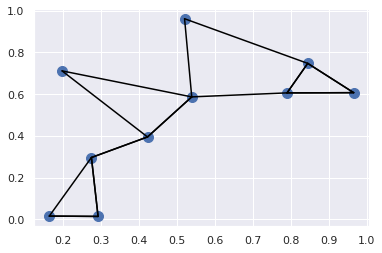

In [49]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

Each point in the plot has lines drawn to its two nearest neighbors. At first glance, it might seem strange that some of the points have more than two lines coming out of them: this is due to the fact that if point A is one of the two nearest neighbors of point B, this does not necessarily imply that point B is one of the two nearest neighbors of point A.

Although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python. You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually, but this would almost certainly lead to a slower algorithm than the vectorized version we used. The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.

https://jakevdp.github.io/PythonDataScienceHandbook/02.09-structured-data-numpy.html